## Formation DIU 
  


### Algorithmique des kppv

#### Mardi 18 juin (matin)

[Jérôme Fellus](jerome.fellus@irisa.fr)

Problème de décision :

Système apprenant ou pas ... pas vraiment

$$f_\Theta:x\to y$$
$f(x)$ : réalité  
$\hat f(x) \to \hat y$ : prédiction (hypothèse)


**Jeu d'entrainement :**  
$(x,y)$ vérité terrain $\to y = f(x)$ réalité  
$x$ entrée de référence  
$y$ sortie désirée  

**Erreur de prédiction :**  
$l$ une distance ...  
$e = l(f(x),\hat f(x))$  

Le but est de pouvoir minimiser $e(x)$ pour tout $x$  
En pratique : la minimalisation du **risque empirique**  (ERM)
- minimiser $e(x)$ pour tous les couples $(x_i, y_i)$ du jeu d'entrainement  

Risque **structurel** lié au niveau complexité de l'espace de fonction dans lequel on décrit le **prédicteur** $\hat f$ (indépendement du jeu d'entrainement)

Il existe beaucoup d'algorithmes dits d'apprentissages, **kppv**, n'est qu'une de ces méthodes. Pas la meilleure.

### kppv : une méthode d'apprentissage supervisée

**Exemple : modélisation de densité**  
Exemple taille en fonction de l'âge 
humain est un booleen  
Suppervisé $\to$ couples $(age_i, taille_i, humain)$  
Non-suppervisé $\to$ couples $(age_i, taille_i)$  
humain $= f(age, taille)$  
Prédire la probabilité que ce soit un humain connaissant $(age, taille)$  


**Supervisée** : la variable que l'on veut prédire est incluse (ou renseignée) dans le jeu de données ou pas.  
**Non-supervisée** : la donnée n'est pas incluse

KPPV (KNN en anglais) : toujours supervisée mais **classification** ou **régression**

$D ={(x_i,y_i)}_i^n$ $D$ dataSet (ensemble de données)

La fonction n'est pas paramètrée  $\hat f(x)$(pas de Theta), contrairement à $\hat f_\Theta(x)$

Avec k=1 : le plus proche voisin (PPV)  
PPV : $\hat f(x,D) = y_{argmin_i}L(x,x_i)$  avec $L(x_1,x_2) : \text {distance}$  


**Exemple :**  
(nn.py)

Populating the interactive namespace from numpy and matplotlib


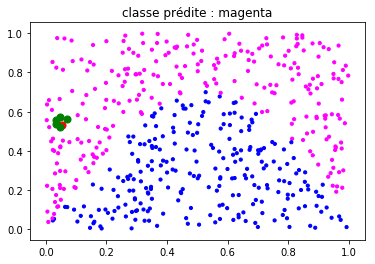

In [1]:
%pylab inline
from numpy import *
from matplotlib import pyplot as plt

# Jeu d'apprentissage
N = 500
Xtrain = random.rand(N,2)    # Points (Matrice à 2 dimensions)
# La vérité terrain si dessous est inconnue (Là c'est une triche pour l'exemple)
Ytrain = where(sin(Xtrain[:,0]*3)*0.7>Xtrain[:,1], 'blue', 'magenta') # Classes associées


def dist(x,y):  # distance définie par rapport au problème donné
    return sqrt(sum((x-y)**2))  # utilise Numpy

def nn(x, X):  # 1 plus proche voisin x entrée, X dataSet 
    mind = dist(x,X[0])
    imind = 0
    for i in range(1,X.shape[0]): # X.shape[0] = Dimension de la liste = N
        d = dist(x,X[i])
        if d<=mind:
            mind = d
            imind = i
    return imind

def knn(k, x, X):
    dists = [float('inf')]*k  # distance initiale
    inds = [-1]*k
    for i in range(1,X.shape[0]):
        d = dist(x,X[i])
        if d<=dists[0]:
            insere_liste_triee_limite(dists, inds, d, i)
    return inds

def insere_liste_triee_limite(l, indices, e, ind):
    l[0] = e
    indices[0] = ind
    for i in range(len(l)-1):
        if l[i]<l[i+1]:
            (l[i],l[i+1])=(l[i+1],l[i])
            (indices[i],indices[i+1])=(indices[i+1],indices[i])


for t in range(1): #initialement range(100)
    # On genère un point dont on doit predire la classe
    x = random.rand(2)

    # Prediction PPV
    ppv = knn(5, x, Xtrain)
    classe_predite = Ytrain[ppv] # numPy
    (classe, counts) = unique(classe_predite, return_counts=True)
    classe_predite = classe[argmax(counts)]  # Vote majoritaire
    
    # Affichage du jeu d'apprentissage, du point requete en rouge, et de son PPV en vert
    plt.ion()
    plt.clf()
    plt.scatter(Xtrain[:,0], Xtrain[:,1], c=Ytrain, s=10)
    plt.scatter(x[0], x[1], c='r', s=50)
    plt.scatter(Xtrain[ppv,0], Xtrain[ppv,1], c='g', s=50)
    #plt.title("classe prédite : " + str(classe_predite))
    plt.title(f"classe prédite : " + classe_predite)
    plt.show()
    plt.pause(1)

1. On récupère les indices des k plus proches voisins dans ${(i_1, i_2, ...i_k)}$
2. On prend les y correspondants ${(y[i_1], y[i_2], ...y[i_k])}$
3. On retourne le $y[i_j]$ le plus fréquent dans ${(y[i_1], y[i_2], ...y[i_k])}$